<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# *Data Science Unit 4 Sprint 2 Assignment 1*

Use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

## Load Your Data

In [1]:
import numpy as np
import tensorflow as tf 

data = np.load("../quickdraw10.npz")
X = data['arr_0']
y = data['arr_1']

print(X.shape)
print(y.shape)

(100000, 784)
(100000,)


In [2]:
class_names = ['apple',
 'anvil',
 'airplane',
 'banana',
 'The Eiffel Tower',
 'The Mona Lisa',
 'The Great Wall of China',
 'alarm clock',
 'ant',
 'asparagus']

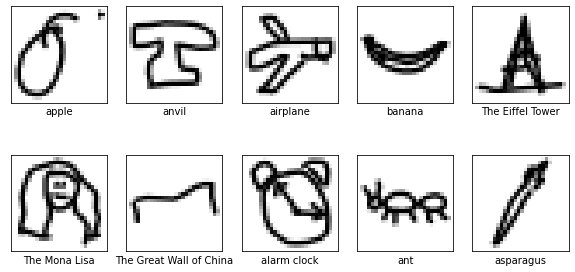

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
start = 0

for num, name in enumerate(class_names):
    plt.subplot(2,5, num+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[start].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(name)
    start += 10000
plt.show()

In [4]:
# Need this line to randomly shuffle both the X & y at the same time.

from sklearn.utils import shuffle
X, y = shuffle(X, y)

## Build Your Baseline Model
Some Hints:


*  Model should have 784 input values (like mnist)
*  Use `sparse_categorical_crossentropy` as your loss function.
* You need 10 neurons in your last layer for output
* You can add as many hidden layers with as many neurons in them as you like. 
* Limit your model epochs to 30 each time you fit.
* You can use the `validation_split` command to automatically create a training / validation dataset.  Specify a percentage such as .2 in your fit statement. 



In [5]:
import os
import datetime
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

# Hidden Layer 1
model.add(Dense(units=128, input_dim=784, activation="elu", name="Input_Layer"))

# Hidden Layer 2
model.add(Dense(units=128, input_dim=784, activation="elu"))

# Hidden Layer 3
model.add(Dense(units=64, input_dim=784, activation="elu"))

# Hidden Layer 4
model.add(Dense(units=10, input_dim=784, activation="softplus"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Dense)          (None, 128)               100480    
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 125,898
Trainable params: 125,898
Non-trainable params: 0
_________________________________________________________________


In [6]:
from tensorflow.keras.optimizers import Adam

adam = Adam()

model.compile(optimizer=adam,
              loss="binary_crossentropy",
              metrics=["accuracy"]
)

In [7]:
baseline = model.fit(X, y, epochs=30,
                     batch_size=64,
                     validation_split=0.2,
                     callbacks=[tensorboard_callback]
)

Epoch 1/30
1250/1250 [==============================] - 38s 28ms/step - loss: -39.9350 - accuracy: 0.1016 - val_loss: -41.4276 - val_accuracy: 0.0977
Epoch 2/30
1250/1250 [==============================] - 26s 21ms/step - loss: -40.9894 - accuracy: 0.1011 - val_loss: -41.4276 - val_accuracy: 0.0977
Epoch 3/30
1250/1250 [==============================] - 28s 22ms/step - loss: -41.0203 - accuracy: 0.1008 - val_loss: -41.4276 - val_accuracy: 0.0977
Epoch 4/30
1250/1250 [==============================] - 27s 21ms/step - loss: -41.1495 - accuracy: 0.0992 - val_loss: -41.4276 - val_accuracy: 0.0977
Epoch 5/30
1250/1250 [==============================] - 15s 12ms/step - loss: -41.0799 - accuracy: 0.1002 - val_loss: -41.4276 - val_accuracy: 0.0977
Epoch 6/30
1250/1250 [==============================] - 20s 16ms/step - loss: -41.0877 - accuracy: 0.1015 - val_loss: -41.4276 - val_accuracy: 0.0977
Epoch 7/30
1250/1250 [==============================] - 17s 14ms/step - loss: -41.0501 - accuracy: 0

In [8]:
model2 = Sequential()
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

# Hidden Layer 1
model2.add(Dense(units=128, input_dim=784, activation="relu", name="Input_Layer"))

# Hidden Layer 2
model2.add(Dense(units=128, input_dim=784, activation="relu"))

# Hidden Layer 3
model2.add(Dense(units=64, input_dim=784, activation="relu"))

# Hidden Layer 4
model2.add(Dense(units=10, input_dim=784, activation="softmax"))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Dense)          (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 125,898
Trainable params: 125,898
Non-trainable params: 0
_________________________________________________________________


In [9]:
model2.compile(optimizer="adamax",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
)

second_arc = model2.fit(X, y, epochs=30,
                     batch_size=128,
                     validation_split=0.2,
                     callbacks=[tensorboard_callback]
)

Epoch 1/30
625/625 [==============================] - 13s 18ms/step - loss: 7.0241 - accuracy: 0.4231 - val_loss: 1.3962 - val_accuracy: 0.5718
Epoch 2/30
625/625 [==============================] - 10s 16ms/step - loss: 1.2896 - accuracy: 0.6004 - val_loss: 1.1223 - val_accuracy: 0.6658
Epoch 3/30
625/625 [==============================] - 9s 15ms/step - loss: 1.0150 - accuracy: 0.7016 - val_loss: 0.9603 - val_accuracy: 0.7298
Epoch 4/30
625/625 [==============================] - 10s 15ms/step - loss: 0.8633 - accuracy: 0.7444 - val_loss: 0.8503 - val_accuracy: 0.7533
Epoch 5/30
625/625 [==============================] - 9s 14ms/step - loss: 0.7402 - accuracy: 0.7763 - val_loss: 0.7760 - val_accuracy: 0.7728
Epoch 6/30
625/625 [==============================] - 9s 14ms/step - loss: 0.6509 - accuracy: 0.8004 - val_loss: 0.7102 - val_accuracy: 0.7936
Epoch 7/30
625/625 [==============================] - 9s 14ms/step - loss: 0.5919 - accuracy: 0.8149 - val_loss: 0.6867 - val_accuracy: 0.8

### Visualize the results

Create charts for both loss and accuracy by epoch. Use line graphs for both charts. Analyze the results. 

At what point should we have stopped training the model and why? 

In [10]:
type(baseline.history)

dict

In [11]:
print(baseline.history)

{'loss': [-40.82875442504883, -41.010379791259766, -41.01038360595703, -41.01034927368164, -41.01041030883789, -41.01044464111328, -41.01041030883789, -41.010379791259766, -41.010379791259766, -41.010379791259766, -41.01035690307617, -41.010414123535156, -41.01039505004883, -41.010406494140625, -41.010414123535156, -41.01039123535156, -41.010414123535156, -41.0103874206543, -41.010414123535156, -41.0103874206543, -41.0103759765625, -41.010406494140625, -41.010440826416016, -41.010414123535156, -41.01040267944336, -41.01036071777344, -41.01039505004883, -41.0103759765625, -41.010414123535156, -41.01039505004883], 'accuracy': [0.10131250321865082, 0.10123749822378159, 0.10123749822378159, 0.10123749822378159, 0.10123749822378159, 0.10123749822378159, 0.10123749822378159, 0.10123749822378159, 0.10123749822378159, 0.10123749822378159, 0.10123749822378159, 0.10123749822378159, 0.10123749822378159, 0.10123749822378159, 0.10123749822378159, 0.10123749822378159, 0.10123749822378159, 0.10123749

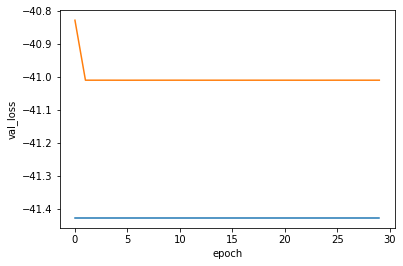

In [12]:
import seaborn as sns
import pandas as pd

base_df = pd.DataFrame.from_records(baseline.history)
base_df['epoch'] = [i for i in range(base_df.shape[0])]

ax = sns.lineplot(x='epoch', y='val_loss', data=base_df)
ax = sns.lineplot(x='epoch', y='loss', data=base_df);

In [13]:
print(second_arc.history)

{'loss': [3.0186479091644287, 1.2173006534576416, 0.991102933883667, 0.8407999277114868, 0.7340602278709412, 0.6526136994361877, 0.5913281440734863, 0.5466811656951904, 0.5072576403617859, 0.47618043422698975, 0.44967925548553467, 0.4280479848384857, 0.40766382217407227, 0.38837894797325134, 0.37008604407310486, 0.3532717823982239, 0.3383827805519104, 0.32526856660842896, 0.31291139125823975, 0.3004888892173767, 0.28944462537765503, 0.2781870663166046, 0.268564373254776, 0.259341835975647, 0.25082629919052124, 0.242950901389122, 0.233435720205307, 0.22610901296138763, 0.22247299551963806, 0.21378539502620697], 'accuracy': [0.48487499356269836, 0.628250002861023, 0.7088375091552734, 0.7517625093460083, 0.7791875004768372, 0.799762487411499, 0.8150749802589417, 0.8287875056266785, 0.8388749957084656, 0.8483499884605408, 0.8565499782562256, 0.8624749779701233, 0.8691750168800354, 0.8741000294685364, 0.8811249732971191, 0.8862125277519226, 0.8898249864578247, 0.8930875062942505, 0.89718747

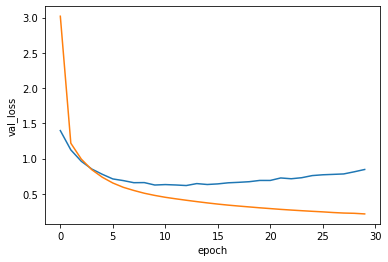

In [14]:
df = pd.DataFrame.from_records(second_arc.history)
df['epoch'] = [i for i in range(df.shape[0])]

ax = sns.lineplot(x='epoch', y='val_loss', data=df)
ax = sns.lineplot(x='epoch', y='loss', data=df);

## Change Optimizers
Try using the keras `adam` optimizer instead of `sgd` in your model. Visualize the difference in validation loss between the models with different optimizers. 

I used "Adam" optimizer above; I had strange errors with the SGD optimizer. First, my tensorflow_callback sent an error with SGD, then, when removing the tensorflow_callback, no lines showed on the plot.

Though, upon further reflection and tinkering, I've found between the sixth and ninth epoch should be the best stopping spot.

In [15]:
# from tf.keras.optimizers import Adam

# adam = Adam()

### Additional Written Tasks:
In this section, you will need to search for resources: 
1. Investigate the various [loss functions](https://www.tensorflow.org/api_docs/python/tf/keras/losses). Which is best suited for the task at hand (predicting 1 / 0) and why? 
Binary crossentropy 
2. What is the difference between a loss function and a metric? Why might we need both in Keras? 
3. Investigate the various [optimizers](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers). Stochastic Gradient Descent (`sgd`) is not the learning algorithm dejour anyone. Why is that? What do newer optimizers such as `adam` have to offer? 

## Stretch Goals: 

- Research convolutional neural networks and try including convolution layers in your network.
- Pick two classes and make QuickDraw a binary classification problem, how does your model architecture change?
- Implement Cross Validation model evaluation on your Quickdraw implementation 

Watch some more videos on Gradient Descent:
- [Gradient Descent, Step-by-Step](https://www.youtube.com/watch?v=sDv4f4s2SB8)  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
- [Stochastic Gradient Descent, Clearly Explained!!!](https://www.youtube.com/watch?v=vMh0zPT0tLI) by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
- [Siraj Raval the evolution of gradient descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)